In [1]:
from optimize_design import EvaluateDesign
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D     # 3D plotting functions

In [2]:
env_id = "three_link_robot_arm-v0"
# "agent_12345_900000_steps.zip"
model_id = Path("final_agent_7671.zip")
model_path = Path("Training_Data/TD3/Limited_NonRandom/models")

eval_design = EvaluateDesign(env_id=env_id, 
                                model_id=model_id, 
                                model_path=model_path, 
                                save_path="Eval_Data/")

# Function to optimize
params = eval_design.p_nom

# Set the function
func = eval_design.evaluate_agent

p_lower = 0.75 * eval_design.p_nom
p_upper = 1.25 * eval_design.p_nom

C:\Users\andre\anaconda3\envs\stablebaselines3\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
C:\Users\andre\anaconda3\envs\stablebaselines3\lib\site-packages\stable_baselines3\common\save_util.py:166: UserWarning: Could not deserialize object tensorboard_log. Consider using `custom_objects` argument to replace this object.
  warnings.warn(


In [10]:
# Change l1 and l2
X = np.linspace(p_lower[3], p_upper[3], 15)
Y = np.linspace(p_lower[4], p_upper[4], 15)
X_P, Y_P = np.meshgrid(X, Y)
Z_P = np.zeros((len(X), len(Y)))

x = -1
for x_i in X:
    x += 1
    y = -1
    for y_i in Y:
        y += 1
        params[3] = x_i
        params[4] = y_i
        Z_P[x][y] = func(params)

Power used with [10.         10.         10.          1.5         1.5         2.5
  3.33333333  3.33333333  3.33333333]: 7475.480291095225
Power used with [10.         10.         10.          1.5         1.57142857  2.5
  3.33333333  3.33333333  3.33333333]: 7603.722495748698
Power used with [10.         10.         10.          1.5         1.64285714  2.5
  3.33333333  3.33333333  3.33333333]: 6685.843411969131
Power used with [10.         10.         10.          1.5         1.71428571  2.5
  3.33333333  3.33333333  3.33333333]: 6896.363683463135
Power used with [10.         10.         10.          1.5         1.78571429  2.5
  3.33333333  3.33333333  3.33333333]: 6200.599263813197
Power used with [10.         10.         10.          1.5         1.85714286  2.5
  3.33333333  3.33333333  3.33333333]: 5405.368444270527
Power used with [10.         10.         10.          1.5         1.92857143  2.5
  3.33333333  3.33333333  3.33333333]: 4884.237040884735
Power used with [10.       

<ipython-input-12-822acdcfe329>:9: UserWarning: The following kwargs were not used by contour: 'zdir'
  cset = plt.contourf(X_P, Y_P, Z_P, zdir='z', cmap=plt.cm.Blues)


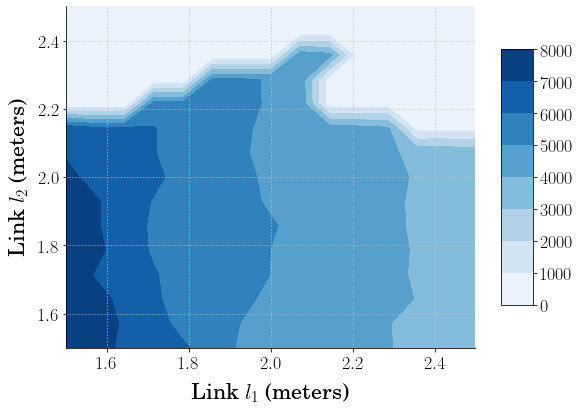

In [12]:
# Plot the surface.
fig = plt.figure(figsize=(9,6))
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)

# plt.setp(ax.get_ymajorticklabels(), fontsize=18)
# plt.setp(ax.get_xmajorticklabels(), fontsize=18)
# plt.setp(ax.get_zmajorticklabels(), fontsize=18)

cset = plt.contourf(X_P, Y_P, Z_P, zdir='z', cmap=plt.cm.Blues)
# Set the labels
plt.xlabel(r'Link $l_1$ (meters)', fontsize=22, weight='bold', labelpad=10)
plt.ylabel(r'Link $l_2$ (meters)', fontsize=22, weight='bold', labelpad=10)

# Change the colorbar font
color_bar = plt.colorbar(cset, shrink=0.75, aspect=8)
cbytick_obj = plt.getp(color_bar.ax.axes, 'yticklabels')
plt.setp(cbytick_obj,  fontsize=18)

# Export to svg for final edits in iDraw/Graphic
plt.savefig('contour_l1_l2.svg', transparent=True)
plt.show()

In [4]:
# Change l1 and l3
X_2 = np.linspace(p_lower[3], p_upper[3], 15)
Y_2 = np.linspace(p_lower[5], p_upper[5], 15)
X_P_2, Y_P_2 = np.meshgrid(X_2, Y_2)
Z_P_2 = np.zeros((len(X_2), len(Y_2)))

x = -1
for x_i in X_2:
    x += 1
    y = -1
    for y_i in Y_2:
        y += 1
        params[3] = x_i
        params[5] = y_i
        Z_P_2[x][y] = func(params, render=False)

Power used with [10.         10.         10.          1.5         2.          1.5
  3.33333333  3.33333333  3.33333333]: 4346.154776363522
Power used with [10.         10.         10.          1.5         2.          1.57142857
  3.33333333  3.33333333  3.33333333]: 4370.826005221263
Power used with [10.         10.         10.          1.5         2.          1.64285714
  3.33333333  3.33333333  3.33333333]: 4303.946489348904
Power used with [10.         10.         10.          1.5         2.          1.71428571
  3.33333333  3.33333333  3.33333333]: 4243.094402189842
Power used with [10.         10.         10.          1.5         2.          1.78571429
  3.33333333  3.33333333  3.33333333]: 4246.599605265072
Power used with [10.         10.         10.          1.5         2.          1.85714286
  3.33333333  3.33333333  3.33333333]: 4541.081312483204
Power used with [10.         10.         10.          1.5         2.          1.92857143
  3.33333333  3.33333333  3.33333333]: 450

<ipython-input-8-eb6ebbe1ab68>:9: UserWarning: The following kwargs were not used by contour: 'zdir'
  cset = plt.contourf(X_P_2, Y_P_2, Z_P_2, zdir='z', cmap=plt.cm.Blues)


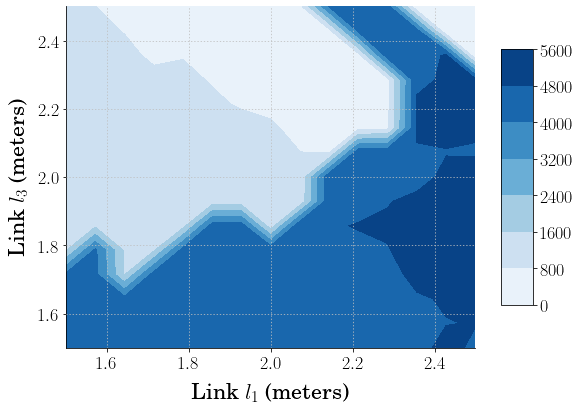

In [8]:
# Plot the surface.
fig = plt.figure(figsize=(9,6))
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)

# plt.setp(ax.get_ymajorticklabels(), fontsize=18)
# plt.setp(ax.get_xmajorticklabels(), fontsize=18)
# plt.setp(ax.get_zmajorticklabels(), fontsize=18)

cset = plt.contourf(X_P_2, Y_P_2, Z_P_2, zdir='z', cmap=plt.cm.Blues)
# Set the labels
plt.xlabel(r'Link $l_1$ (meters)', fontsize=22, weight='bold', labelpad=10)
plt.ylabel(r'Link $l_3$ (meters)', fontsize=22, weight='bold', labelpad=10)

# Change the colorbar font
color_bar = plt.colorbar(cset, shrink=0.75, aspect=8)
cbytick_obj = plt.getp(color_bar.ax.axes, 'yticklabels')
plt.setp(cbytick_obj,  fontsize=18)

# Export to svg for final edits in iDraw/Graphic
plt.savefig('contour_l1_l3.svg', transparent=True)
plt.show()

In [13]:
# Change l2 and l3
X_2 = np.linspace(p_lower[4], p_upper[4], 15)
Y_2 = np.linspace(p_lower[5], p_upper[5], 15)
X_P_3, Y_P_3 = np.meshgrid(X_2, Y_2)
Z_P_3 = np.zeros((len(X_2), len(Y_2)))

x = -1
for x_i in X_2:
    x += 1
    y = -1
    for y_i in Y_2:
        y += 1
        params[4] = x_i
        params[5] = y_i
        Z_P_3[x][y] = func(params)

Power used with [10.         10.         10.          2.5         1.5         1.5
  3.33333333  3.33333333  3.33333333]: 784.8821163674011
Power used with [10.         10.         10.          2.5         1.5         1.57142857
  3.33333333  3.33333333  3.33333333]: 763.8464764510604
Power used with [10.         10.         10.          2.5         1.5         1.64285714
  3.33333333  3.33333333  3.33333333]: 832.898396276154
Power used with [10.         10.         10.          2.5         1.5         1.71428571
  3.33333333  3.33333333  3.33333333]: 4770.152515791977
Power used with [10.         10.         10.          2.5         1.5         1.78571429
  3.33333333  3.33333333  3.33333333]: 4683.67813020093
Power used with [10.         10.         10.          2.5         1.5         1.85714286
  3.33333333  3.33333333  3.33333333]: 4941.696478138662
Power used with [10.         10.         10.          2.5         1.5         1.92857143
  3.33333333  3.33333333  3.33333333]: 5030.

<ipython-input-14-f4f06e5f3fa6>:9: UserWarning: The following kwargs were not used by contour: 'zdir'
  cset = plt.contourf(X_P_3, Y_P_3, Z_P_3, zdir='z', cmap=plt.cm.Blues)


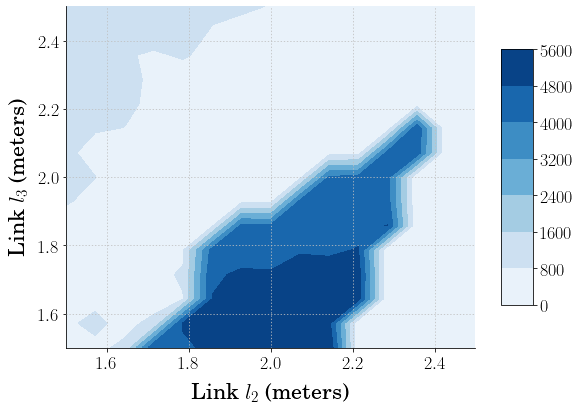

In [14]:
# Plot the surface.
fig = plt.figure(figsize=(9,6))
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)

# plt.setp(ax.get_ymajorticklabels(), fontsize=18)
# plt.setp(ax.get_xmajorticklabels(), fontsize=18)
# plt.setp(ax.get_zmajorticklabels(), fontsize=18)

cset = plt.contourf(X_P_3, Y_P_3, Z_P_3, zdir='z', cmap=plt.cm.Blues)
# Set the labels
plt.xlabel(r'Link $l_2$ (meters)', fontsize=22, weight='bold', labelpad=10)
plt.ylabel(r'Link $l_3$ (meters)', fontsize=22, weight='bold', labelpad=10)

# Change the colorbar font
color_bar = plt.colorbar(cset, shrink=0.75, aspect=8)
cbytick_obj = plt.getp(color_bar.ax.axes, 'yticklabels')
plt.setp(cbytick_obj,  fontsize=18)

# Export to svg for final edits in iDraw/Graphic
plt.savefig('contour_l2_l3.svg', transparent=True)
plt.show()